In [1]:
from fullshape.pk_full_shape import *
import matplotlib.pyplot as plt

In [2]:
# Define value of nuisance parameters
b1 = 2.
sigma_v = 0.
sigma_per = 10.
sigma_par = 10.

In [3]:
# Initiate pk calculator
pk_calc = PK_Calculator(zs = [0.5], mink=1e-4, maxk = 0.1, num_k = 20)

In [4]:
# Set a cosmology
pk_calc.set_cosmology(As=2.142e-9, ns=0.9667, H0=67.36, ombh2=0.02230, 
                            omch2=0.1188, mnu=0.06, omk=0, tau=0.06)

In [5]:
# Calculate anisotropic pk
pk_calc.get_anisotropic_pk(b1, sigma_v, bao_damping = True)

In [6]:
# Generate a noisy realisation
pk_noisy, cov = pk_calc.generate_noisy(nave = 1e-3, vol = 1e11)
p0_noisy, p2_noisy, p4_noisy = pk_noisy

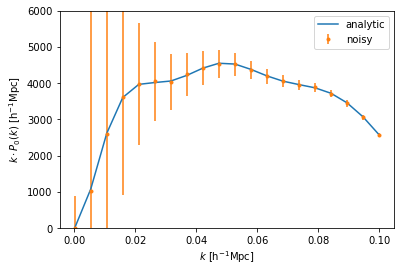

In [7]:
fig = plt.figure()
plt.plot(pk_calc.k, pk_calc.k*pk_calc.p0[0], label = 'analytic')
plt.errorbar(pk_calc.k, pk_calc.k*p0_noisy[0], yerr = np.diag(cov[0, :20, :20])**0.5, fmt = '.', label = 'noisy')
plt.ylabel(r'$k \cdot P_0 (k) \ \mathrm{[h^{-1} Mpc]}$')
plt.xlabel(r'$k \ \mathrm{[h^{-1} Mpc]}$')
plt.ylim([0, 6000])
plt.legend()

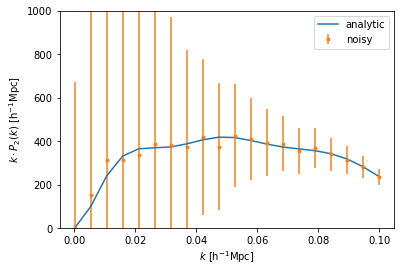

In [8]:
fig = plt.figure()
plt.plot(pk_calc.k, pk_calc.k*pk_calc.p2[0], label = 'analytic')
plt.errorbar(pk_calc.k, pk_calc.k*p2_noisy[0], yerr = np.diag(cov[0, 20:40, 20:40])**0.5, fmt = '.', label = 'noisy')
plt.ylabel(r'$k \cdot P_2 (k) \ \mathrm{[h^{-1} Mpc]}$')
plt.xlabel(r'$k \ \mathrm{[h^{-1} Mpc]}$')
plt.ylim([0, 1000])
plt.legend()

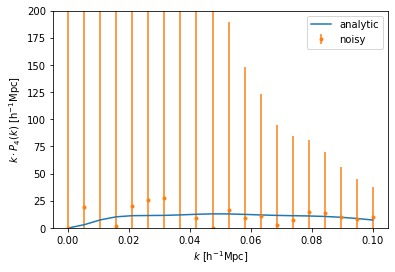

In [9]:
fig = plt.figure()
plt.plot(pk_calc.k, pk_calc.k*pk_calc.p4[0], label = 'analytic')
plt.errorbar(pk_calc.k, pk_calc.k*p4_noisy[0], yerr = np.diag(cov[0, 40:, 40:])**0.5, fmt = '.', label = 'noisy')
plt.ylabel(r'$k \cdot P_4 (k) \ \mathrm{[h^{-1} Mpc]}$')
plt.xlabel(r'$k \ \mathrm{[h^{-1} Mpc]}$')
plt.ylim([0, 200])
plt.legend()